# Task 1 - Solving the Markowitz model for 25 different values of r

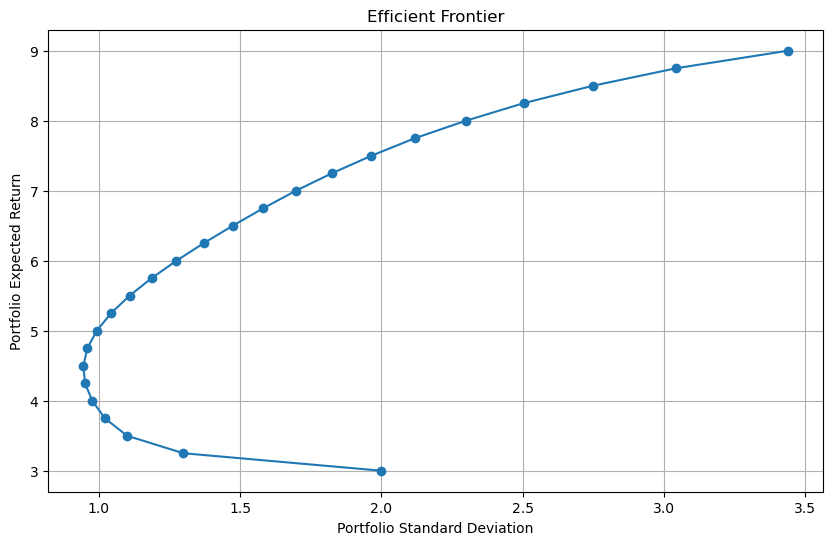

In [20]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import random

# Function to calculate portfolio variance
def calculate_portfolio_variance(weights, cov_matrix):
    
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Function to calculate expected portfolio return
def calculate_portfolio_return(weights, expected_returns):
    return np.dot(expected_returns.T, weights)

# Generate random data
n = 8
d1 = 4
d2 = 9
dummystep = 10 * d1 + d2
for _ in range(dummystep):
    dummy = np.random.uniform(0, 1)

    Corr = np.array([[0] * n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1) ** abs(i - j) / (abs(i - j) + 1)

ssigma = np.array([[0] * 1 for _ in range(n)], dtype=float)
mmu = np.array([[0] * 1 for _ in range(n)], dtype=float)
ssigma[0] = 2
mmu[0]=3

for i in range(n - 1):
    ssigma[i + 1] = ssigma[i] + 2 * np.random.uniform(0, 1)
    mmu[i + 1] = mmu[i] + 1

ddiag = np.array([[0]*n for _ in range(n)], dtype=float)
np.fill_diagonal(ddiag, ssigma)
C2 = np.matmul(np.matmul(ddiag, Corr), ddiag)
C = 0.5 * (C2 + C2.T)

# Initialize arrays to store results
sigma_values = []
mu_values = []

# Range of values for r
r_values = np.arange(3.00, 9.25, 0.25)

# Solve for each value of r
for r in r_values:
# Define optimization problem
    objective = lambda weights: calculate_portfolio_variance(weights, C)
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
                   {'type': 'eq', 'fun': lambda weights: calculate_portfolio_return(weights, mmu) - r})
    bounds = tuple((0, None) for _ in range(n)) # No short selling
    initial_guess = np.ones(n) / n # Equal weights initially

    # Solve optimization problem
    result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    optimized_weights = result.x

    # Calculate portfolio standard deviation and expected return
    sigma = np.sqrt(calculate_portfolio_variance(optimized_weights, C))
    mu = calculate_portfolio_return(optimized_weights, mmu)

    # Store results
    sigma_values.append(sigma)
    mu_values.append(mu)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, mu_values, marker='o', linestyle='-')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Expected Return')
plt.grid(True)
plt.show()

# Task 2 - Modifying the constraint to allow saving without investment

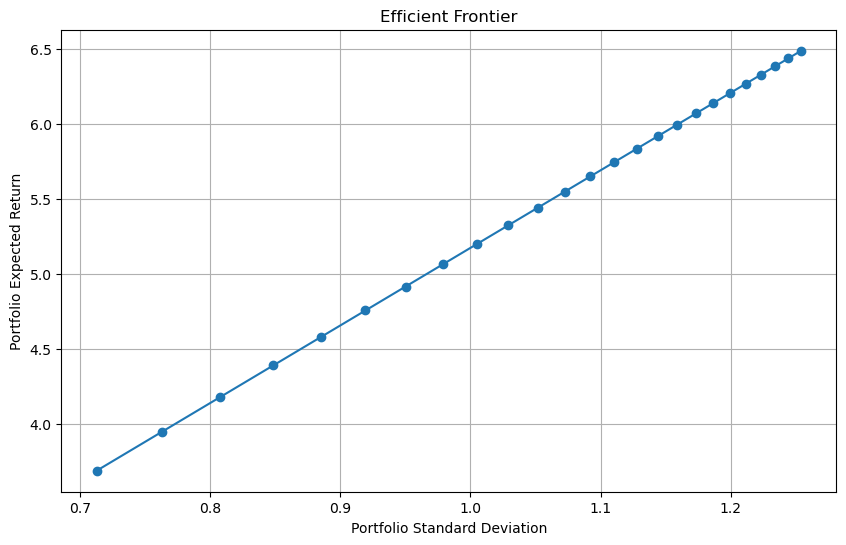

In [15]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Function to calculate portfolio variance
def calculate_portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Function to calculate expected portfolio return
def calculate_portfolio_return(weights, expected_returns):
    return np.dot(expected_returns.T, weights)

# Generate random data
n = 8
d1 = 4
d2 = 9
dummystep = 10 # d1 + d2
random.seed(0)  # For reproducibility
mu = np.random.rand(n) * 10
cov_matrix = np.random.rand(n, n)
cov_matrix = np.dot(cov_matrix, cov_matrix.T)

# Initialize arrays to store results
sigma_values = []
mu_values = []

# Range of values for r
r_values = np.arange(3.00, 9.25, 0.25)

# Solve for each value of r
for r in r_values:
    # Define optimization problem
    objective = lambda weights: calculate_portfolio_variance(weights, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 0.2},  # Invest only 80% of the capital
                   {'type': 'eq', 'fun': lambda weights: calculate_portfolio_return(weights, mu) - r})
    bounds = tuple((0, None) for _ in range(n))  # No short selling
    initial_guess = np.ones(n) / n  # Equal weights initially

    # Solve optimization problem
    result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    optimized_weights = result.x

    # Calculate portfolio standard deviation and expected return
    sigma = np.sqrt(calculate_portfolio_variance(optimized_weights, cov_matrix))
    expected_return = calculate_portfolio_return(optimized_weights, mu)

    # Store results
    sigma_values.append(sigma)
    mu_values.append(expected_return)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, mu_values, marker='o', linestyle='-')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Expected Return')
plt.grid(True)
plt.show()


# Task 3 - Modifying the constraint to uTx ≥ r

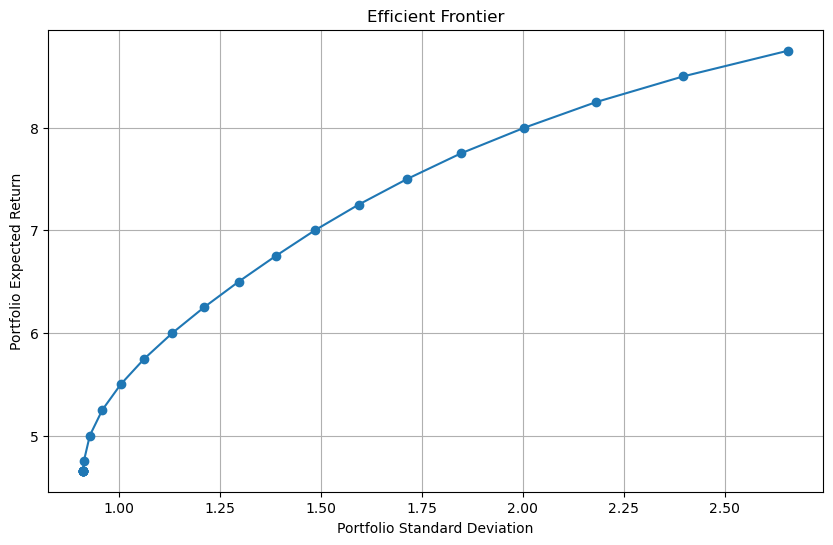

In [23]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Function to calculate portfolio variance
def calculate_portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Function to calculate expected portfolio return
def calculate_portfolio_return(weights, expected_returns):
    return np.dot(expected_returns.T, weights)

# Generate random data
n = 8
d1 = 4
d2 = 9
dummystep = 10 # d1 + d2
for _ in range(dummystep):
    dummy = np.random.uniform(0, 1)

Corr = np.array([[0] * n for _ in range(n)], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1) ** abs(i - j) / (abs(i - j) + 1)
        
ssigma = np.array([[0] * 1 for _ in range(n)], dtype=float)
mmu = np.array([[0] * 1 for _ in range(n)], dtype=float)
ssigma[0]= 2
mmu[0]=3
for i in range(n - 1):
    ssigma[i + 1] = ssigma[i] + 2 * np.random.uniform(0, 1)
    mmu[i + 1] = mmu[i] + 1

ddiag = np.array([[0] * n for _ in range(n)], dtype=float)
np.fill_diagonal(ddiag, ssigma)
C2 = np.matmul(np.matmul(ddiag, Corr), ddiag)
C = 0.5 * (C2 + C2.T)

# Initialize arrays to store results
sigma_values = []
mu_values = []

# Range of values for r
r_values = np.arange(3.00, 9.00, 0.25)

# Solve for each value of r
for r in r_values:
    # Define optimization problem
    objective = lambda weights: calculate_portfolio_variance(weights, C)
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
                   {'type': 'ineq', 'fun': lambda weights: calculate_portfolio_return(weights, mmu) - r})
    bounds = tuple((0, None) for _ in range(n)) # No short selling
    initial_guess = np.ones(n) / n # Equal weights initially

    # Solve optimization problem
    result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    optimized_weights = result.x

    # Calculate portfolio standard deviation and expected return
    sigma = np.sqrt(calculate_portfolio_variance(optimized_weights, C))
    mu = calculate_portfolio_return(optimized_weights, mmu)

    # Store results
    sigma_values.append(sigma)
    mu_values.append(mu)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, mu_values, marker='o', linestyle='-')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Expected Return')
plt.grid(True)
plt.show()

# Task 4 - Allowing short selling

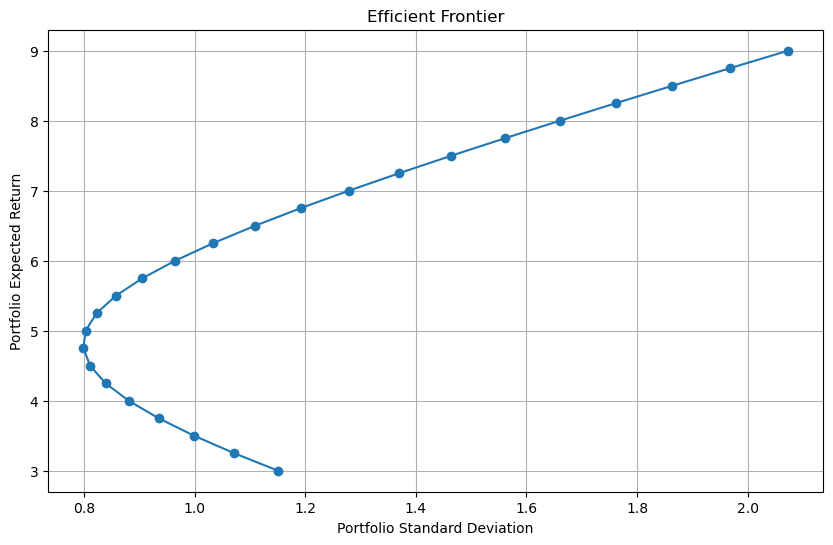

In [24]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Function to calculate portfolio variance
def calculate_portfolio_variance(weights, cov_matrix):
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Function to calculate expected portfolio return
def calculate_portfolio_return(weights, expected_returns):
    return np.dot(expected_returns.T, weights)

# Generate random data
n = 8
d1 = 4
d2 = 9
dummystep = 10 * d1 + d2
for _ in range(dummystep):
    dummy = np.random.uniform(0, 1)

Corr = np.array([[0] * n for _ in range(n) ], dtype=float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1) ** abs(i - j) / (abs(i - j) + 1)

ssigma = np.array([[0] * 1 for _ in range(n)], dtype=float)
mmu = np.array([[0] * 1 for _ in range(n) ], dtype=float)
ssigma[0]= 2
mmu[0]= 3
for i in range(n-1):

    ssigma[i + 1] = ssigma[i] +2 *np.random.uniform(0, 1)

    mmu[i + 1] = mmu[i] + 1

ddiag = np.array([[0] * n for _ in range(n)], dtype=float)
np.fill_diagonal(ddiag, ssigma)
C2 = np.matmul(np.matmul(ddiag, Corr), ddiag)
C = 0.5 * (C2 + C2.T)

# Initialize arrays to store results
sigma_values = []
mu_values = []

# Range of values for r
r_values = np.arange(3.00, 9.25, 0.25)

# Solve for each value of r
for r in r_values:
# Define optimization problem
    objective = lambda weights: calculate_portfolio_variance(weights, C)
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},
                   {'type': 'eq', 'fun': lambda weights: calculate_portfolio_return(weights, mmu) - r})
    bounds = tuple((None, None) for _ in range(n)) # Allow short selling
    initial_guess = np.ones(n) / n # Equal weights initially

    # Solve optimization problem
    result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    optimized_weights = result.x

   # Calculate portfolio standard deviation and expected return
    sigma = np.sqrt(calculate_portfolio_variance(optimized_weights, C))
    mu = calculate_portfolio_return(optimized_weights, mmu)

    # Store results
    sigma_values.append(sigma)
    mu_values.append(mu)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, mu_values, marker='o', linestyle='-')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Expected Return')
plt.grid(True)
plt.show()